In [1]:
import os, sys
# for accessing src, stan, etc.
sys.path.append(os.path.abspath(os.path.join("../..")))

from amortizer import trainer
from bayesflow.diagnostics import plot_losses
from tensorflow.keras.optimizers.legacy import Adam # type: ignore
from tensorflow.keras.optimizers.schedules import CosineDecay # type: ignore

/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/bayesflow/trainers.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
INFO:root:Performing 2 pilot runs with the anonymous model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 8)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 400, 3)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:Initialized empty loss history.
INFO:root:Initialized networks from scratch.
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [3]:
%time
epochs = 100
iterations_per_epoch = 1000
schedule = CosineDecay(0.001, epochs * iterations_per_epoch, name = "lr_decay")
optimizer = Adam(schedule, global_clipnorm = 1.0)
h=trainer.train_online(epochs=epochs, iterations_per_epoch=iterations_per_epoch, batch_size=256, optimizer=optimizer)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 2.15 µs


Training epoch 100: 100%|██████████| 1000/1000 [46:40<00:00,  2.80s/it, Epoch: 100, Iter: 1000,forward.loss: 0.089,backward.loss:: 0.091,posterior.loss: -6.500,W.Decay: 0.033,Avg.forward.loss: 0.088,Avg.backward.loss:: 0.088,Avg.posterior.loss: -6.472,Avg.W.Decay: 0.033,LR: 0.00E+00]


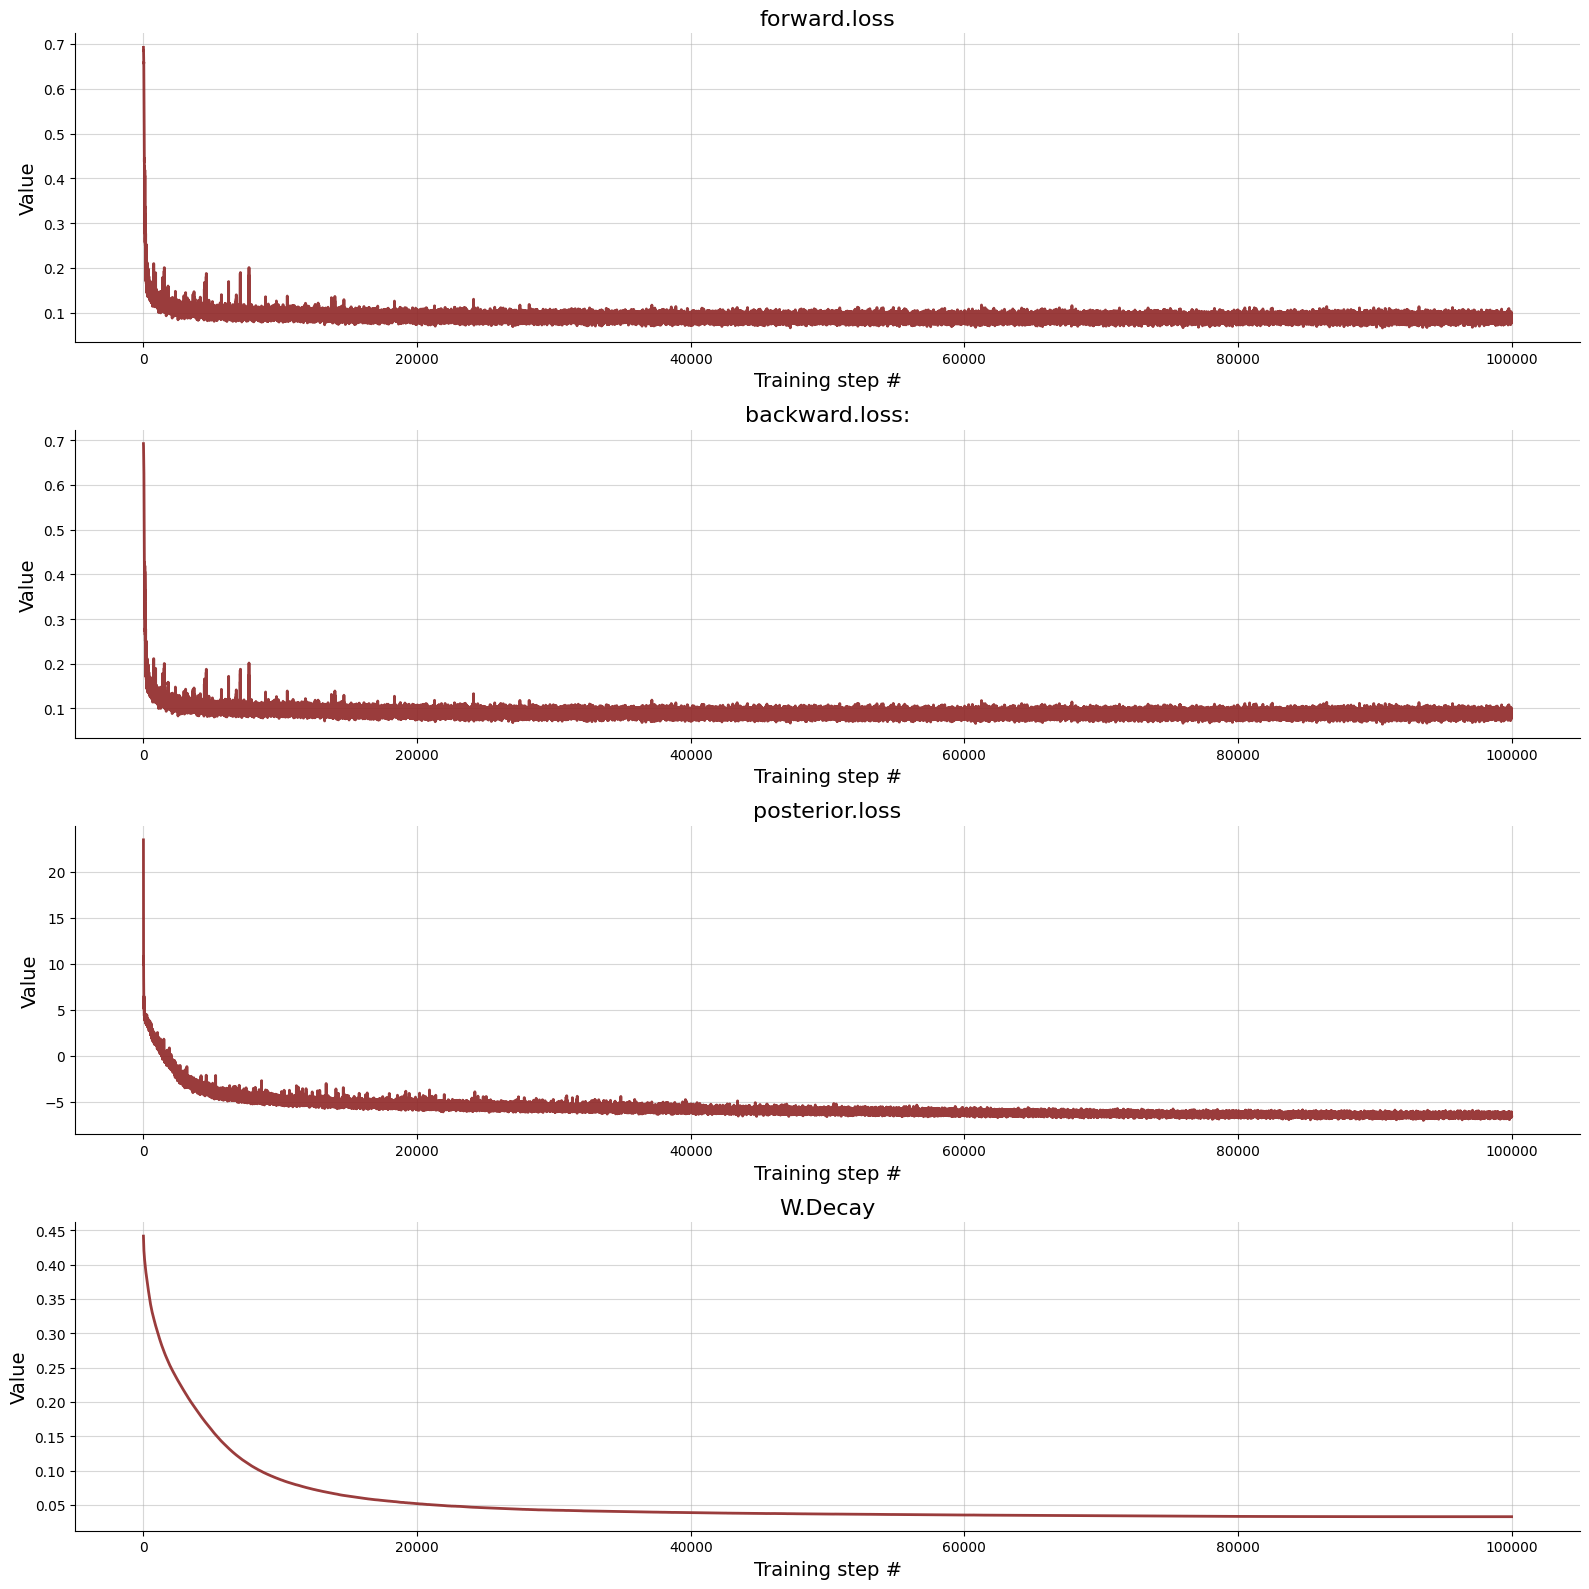

In [4]:
f=plot_losses(h)